In [34]:
from urllib.request import urlopen
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [11]:
target_url0 = "http://www.gutenberg.org/files/135/135-0.txt"
book_raw = urlopen(target_url0).read().decode("utf-8-sig")

war_and_peace = 'https://www.gutenberg.org/files/2600/2600-0.txt'

w_p_raw = urlopen(war_and_peace).read().decode('utf-8-sig')

book_raw[0:250]

'The Project Gutenberg eBook of Les Misérables, by Victor Hugo\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it awa'

In [5]:
word_tokens = word_tokenize(book_raw)


print(word_tokens[0:40])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Les', 'Misérables', ',', 'by', 'Victor', 'Hugo', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever']


In [36]:
stop_words = (stopwords.words('english'))

punctuation = ''',-_."'"'''

filtered_book = [word for word in word_tokens if word.lower() not in stop_words]

filtered_book = [word for word in filtered_book if word not in punctuation]

filtered_book[0:40]

['Project',
 'Gutenberg',
 'eBook',
 'Les',
 'Misérables',
 'Victor',
 'Hugo',
 'eBook',
 'use',
 'anyone',
 'anywhere',
 'United',
 'States',
 'parts',
 'world',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away',
 're-use',
 'terms',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'eBook',
 'online',
 'www.gutenberg.org',
 'located',
 'United',
 'States',
 'check',
 'laws',
 'country',
 'located',
 'using']

In [13]:
print(len(w_p_raw), len(book_raw))

3293551 3324221


In [20]:
mis_sentences = sent_tokenize(book_raw)

w_p_sentences = sent_tokenize(w_p_raw)

In [21]:
print(len(mis_sentences), len(w_p_sentences))

30079 26548


In [25]:
length_mis_sentences = [len(word_tokenize(sentence)) for sentence in mis_sentences]

average_mis_sentences = sum(length_mis_sentences) / len(length_mis_sentences)

length_w_p_sentences = [len(word_tokenize(sentence)) for sentence in w_p_sentences]

average_w_p_sentences = sum(length_w_p_sentences) / len(length_w_p_sentences)

print(average_mis_sentences, average_w_p_sentences)

22.674955949333423 25.395171010998947


In [31]:
f_dist = FreqDist(word_tokens)

word_freq = dict((word_tokens, freq) for word_tokens, freq in f_dist.items())

print(len(f_dist))

word_freq


30352


{'The': 3910,
 'Project': 84,
 'Gutenberg': 28,
 'eBook': 11,
 'of': 19596,
 'Les': 8,
 'Misérables': 3,
 ',': 48757,
 'by': 2272,
 'Victor': 3,
 'Hugo': 6,
 'This': 1006,
 'is': 6006,
 'for': 2780,
 'the': 36547,
 'use': 89,
 'anyone': 7,
 'anywhere': 15,
 'in': 10239,
 'United': 15,
 'States': 15,
 'and': 14028,
 'most': 333,
 'other': 885,
 'parts': 24,
 'world': 201,
 'at': 3506,
 'no': 1591,
 'cost': 29,
 'with': 4419,
 'almost': 320,
 'restrictions': 3,
 'whatsoever': 4,
 '.': 26191,
 'You': 673,
 'may': 319,
 'copy': 21,
 'it': 4833,
 'give': 166,
 'away': 290,
 'or': 939,
 're-use': 2,
 'under': 437,
 'terms': 46,
 'License': 10,
 'included': 8,
 'this': 2954,
 'online': 4,
 'www.gutenberg.org': 5,
 'If': 256,
 'you': 2952,
 'are': 2074,
 'not': 3810,
 'located': 10,
 'will': 1186,
 'have': 2704,
 'to': 13325,
 'check': 8,
 'laws': 28,
 'country': 105,
 'where': 504,
 'before': 468,
 'using': 9,
 'Title': 1,
 ':': 2501,
 'Complete': 2,
 'Five': 22,
 'Volumes': 1,
 'Author': 2,


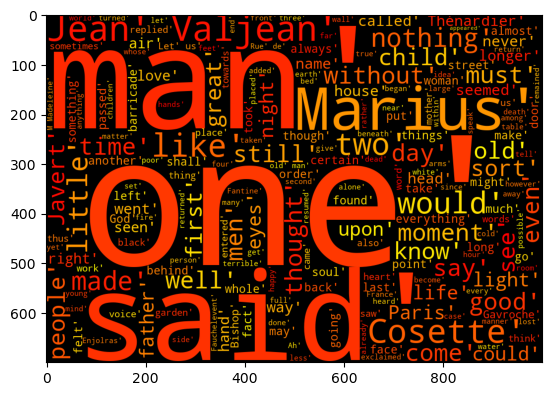

In [37]:
wordcloud = WordCloud(width=1000, height=700, background_color='black', colormap=plt.cm.autumn, min_font_size=10).generate(str(filtered_book))
plt.imshow(wordcloud)

In [41]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 


character_appears = [character for character in filtered_book if character in character_list]



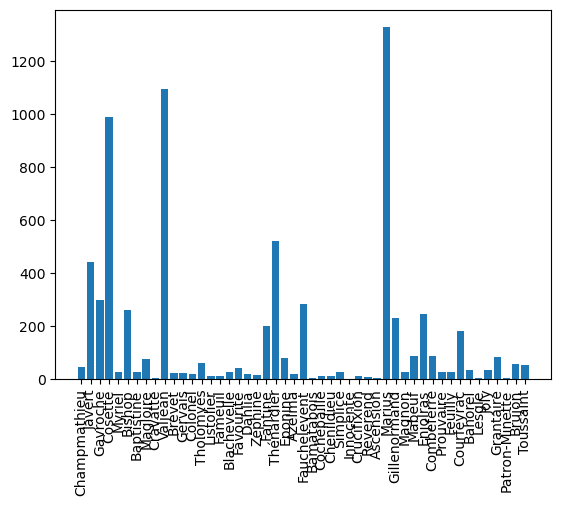

In [52]:
from collections import Counter

name_count = Counter(character_appears)

names, counts = zip(*name_count.items())

plt.bar(names, counts)
plt.xticks(rotation='vertical')
plt.show()